In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error,r2_score

In [8]:
X = np.abs(6 * np.random.rand(200,1) - 3)
y = (5 * X**2) + np.random.rand(200,1) * 15

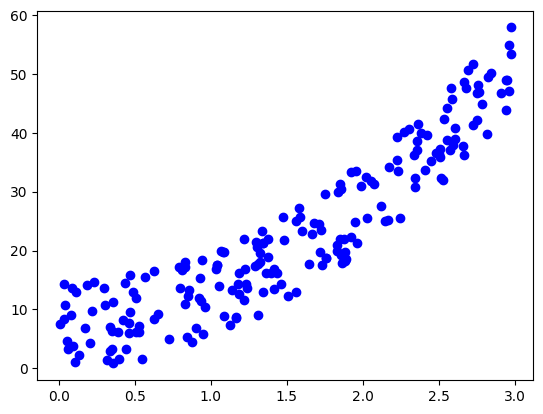

In [10]:
plt.plot(X,y,'bo')
plt.show()

In [13]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [23]:
pf = PolynomialFeatures(degree=20)
X_train_pf = pf.fit_transform(X_train)
X_test_pf = pf.transform(X_test)

In [25]:
# Linear Regression
lr = LinearRegression()
lr.fit(X_train_pf,y_train)
y_pred = lr.predict(X_test_pf)

In [50]:
# Ridge
r = Ridge(alpha=0.2)
r.fit(X_train_pf,y_train)
r_pred = r.predict(X_test_pf)

In [47]:
#Lasso
l = Lasso(alpha=0.2)
l.fit(X_train_pf,y_train)
l_pred = l.predict(X_test_pf)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.754e+03, tolerance: 3.115e+00
  model = cd_fast.enet_coordinate_descent(


In [48]:
#ElasticNet
ela = ElasticNet()
ela.fit(X_train_pf,y_train)
ela_pred = ela.predict(X_test_pf)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.956e+03, tolerance: 3.115e+00
  model = cd_fast.enet_coordinate_descent(


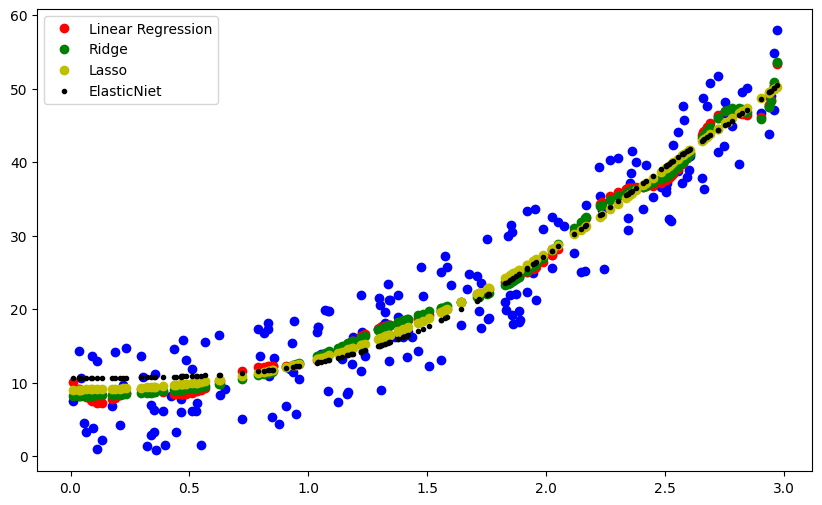

In [52]:
plt.figure(figsize=(10,6))
plt.plot(X,y,'bo')
plt.plot(X_train,lr.predict(X_train_pf),'ro',label='Linear Regression')
plt.plot(X_train,r.predict(X_train_pf),'go',label='Ridge')
plt.plot(X_train,l.predict(X_train_pf),'yo',label='Lasso')
plt.plot(X_train,ela.predict(X_train_pf),'k.',label='ElasticNiet')
plt.legend()
plt.show()